# IMPORTING LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
#Loading the dataset

wine = pd.read_csv(r'C:\Users\Chippy\Downloads\Wine_clust.csv')

In [14]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
#Finding missing values

wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [16]:
wine1=wine.iloc[:,[3,4]].values

In [17]:
type(wine1)

numpy.ndarray

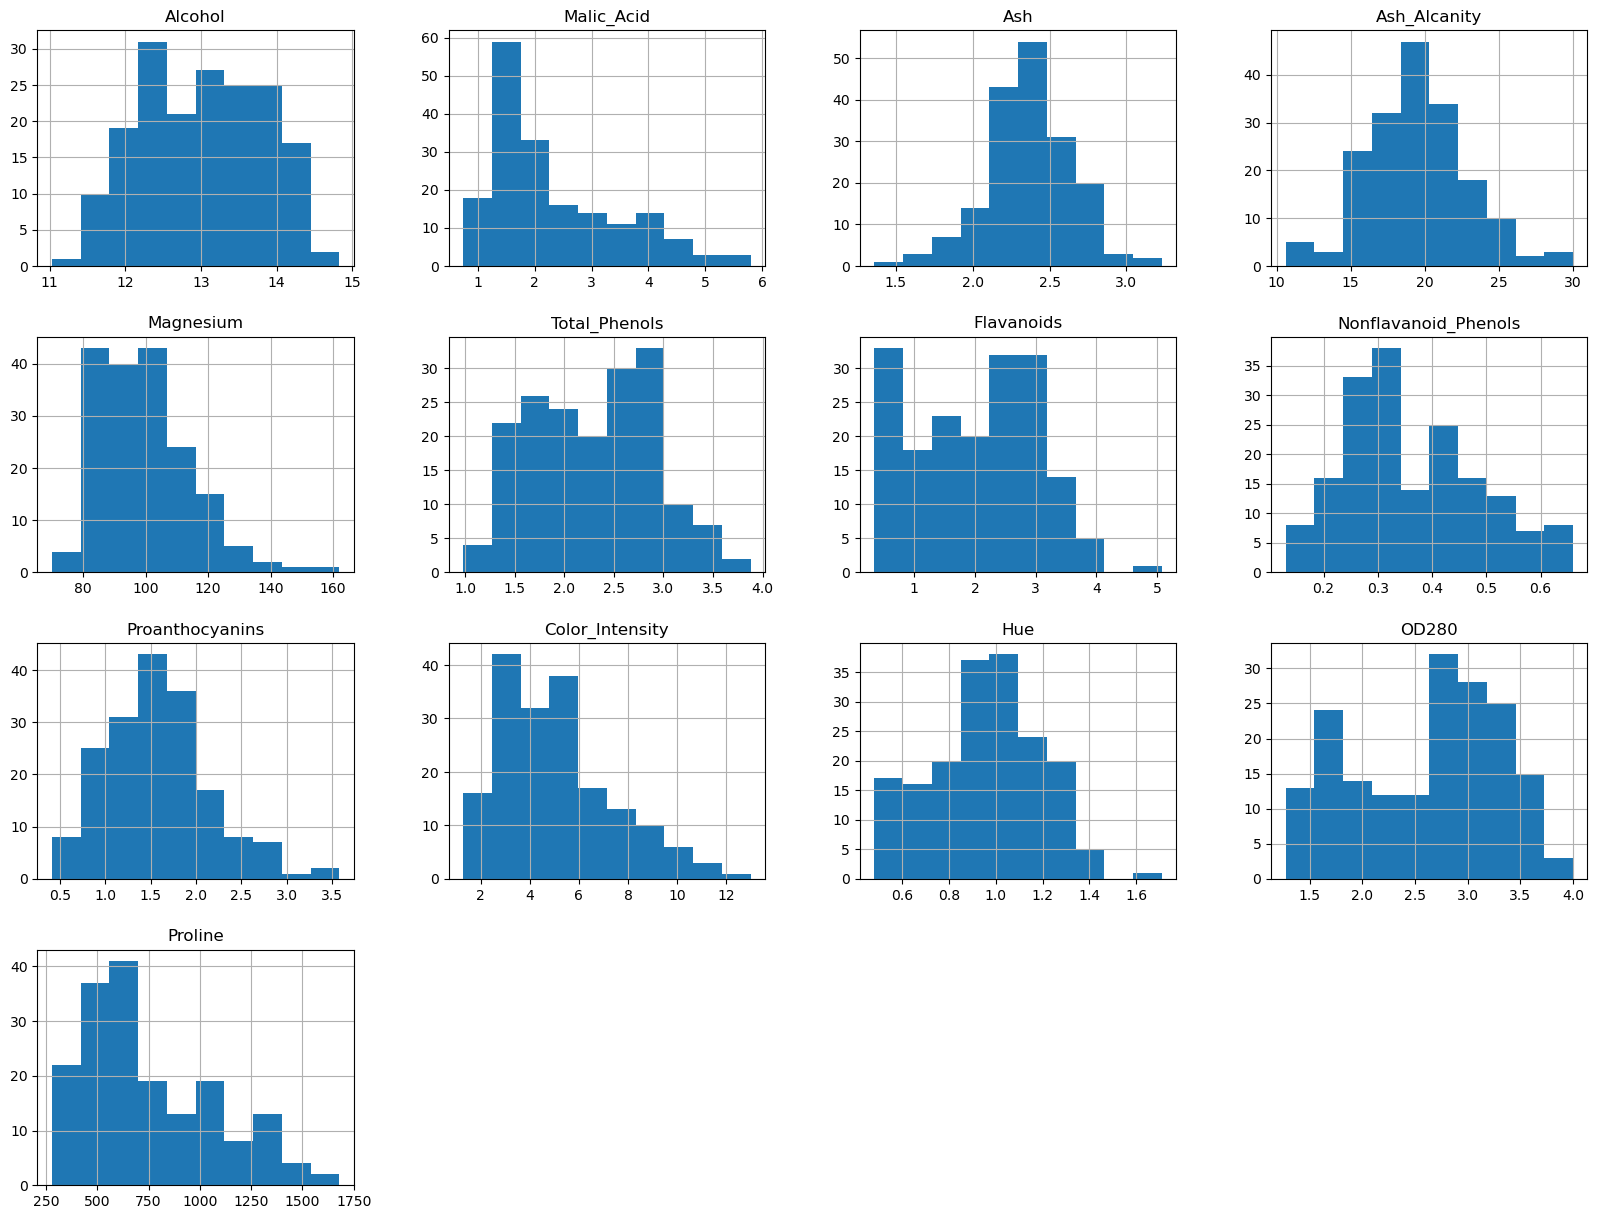

In [18]:
#frequency graph

freqgraph=wine.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

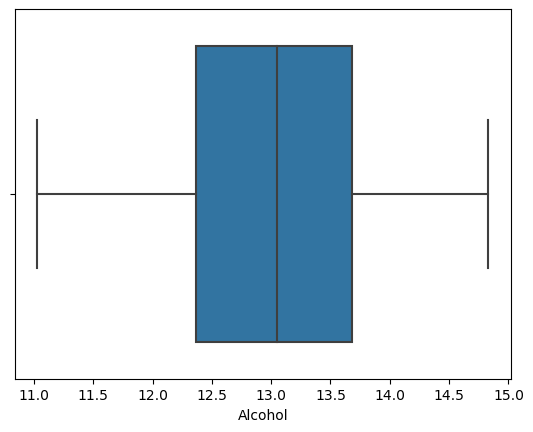

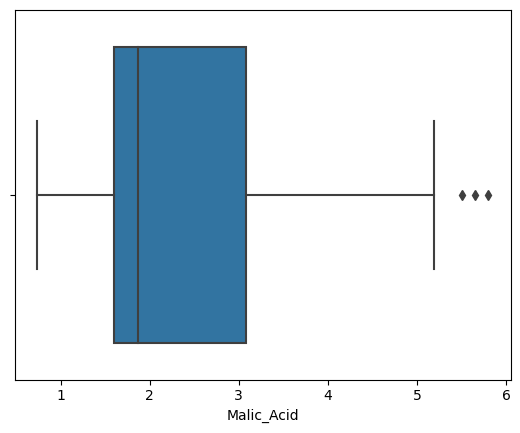

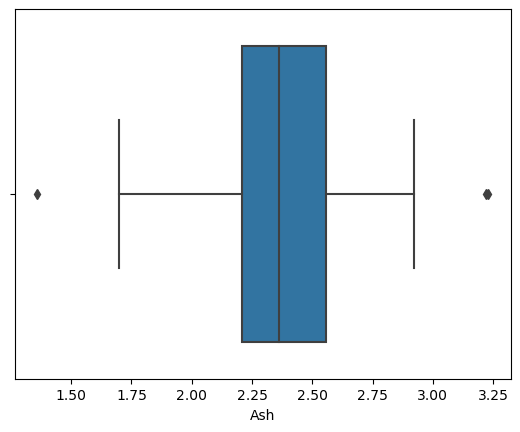

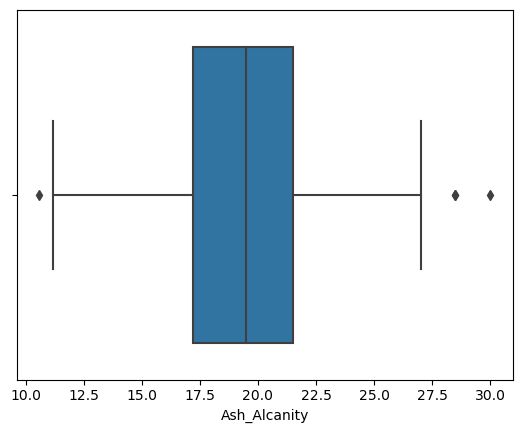

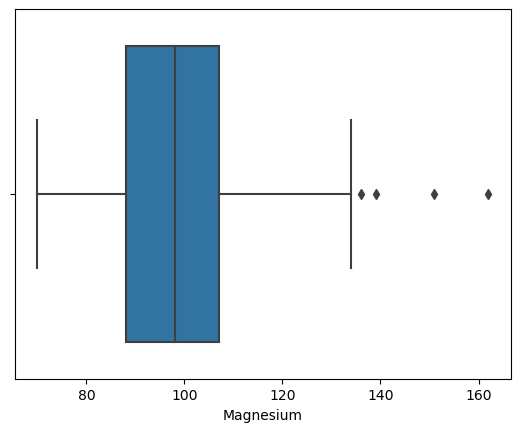

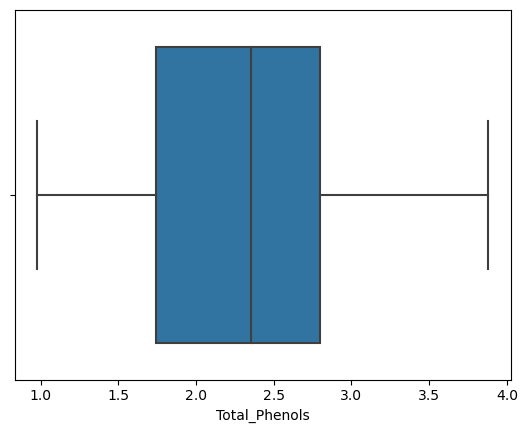

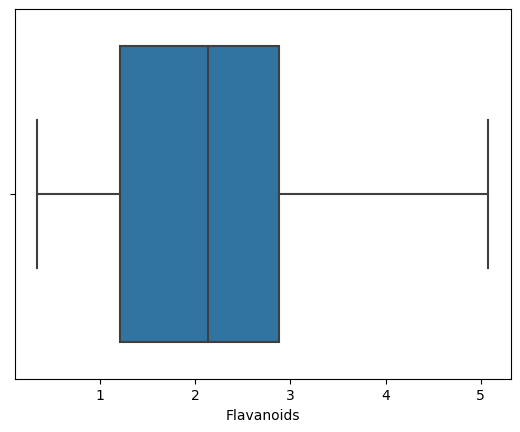

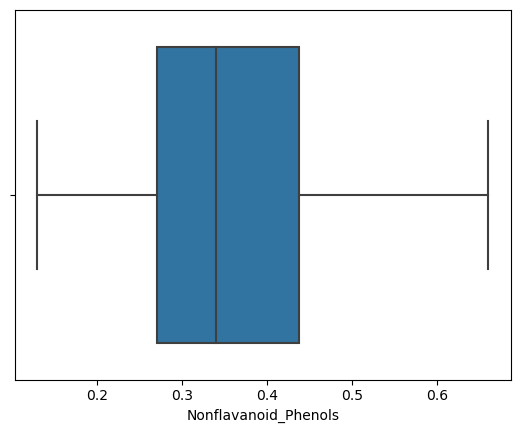

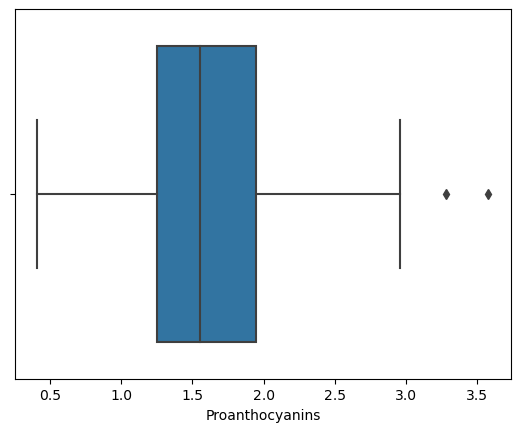

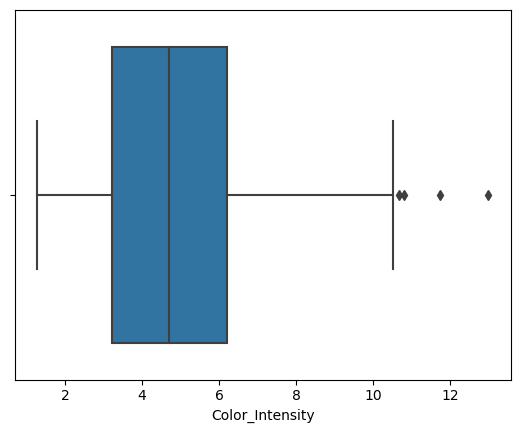

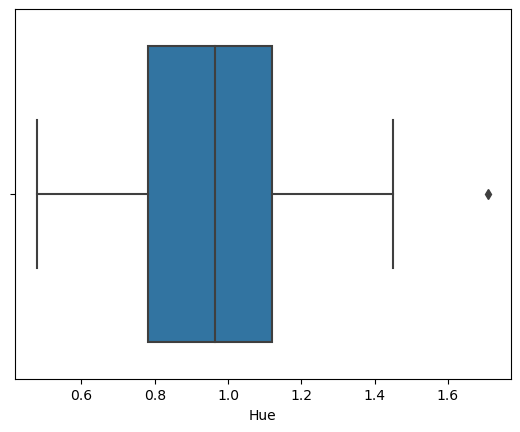

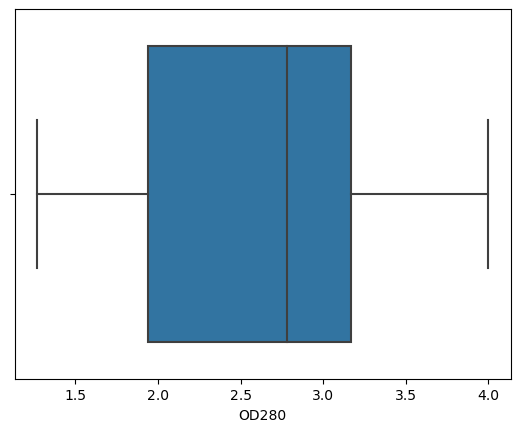

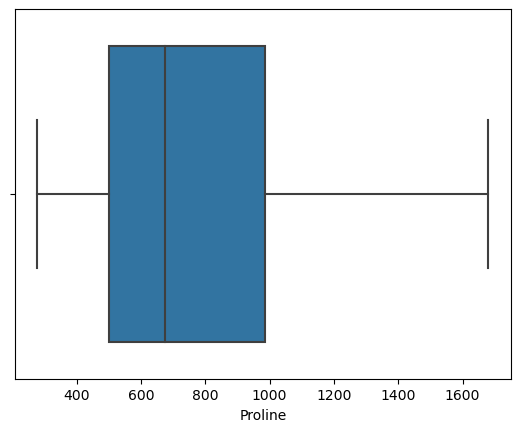

In [19]:
#Boxplot

for i in wine:
    sns.boxplot(x=wine[i])
    plt.show()

Malic_Acid,Ash,Ash_Alcanity,Magnesium,Proanthocyanins,Color_Intensity,Hue

In [20]:
#Removing the outliers

IQR=stats.iqr(wine.Malic_Acid,interpolation="midpoint")
IQR

1.46

In [21]:
Q1=wine.Malic_Acid.quantile(0.25)
Q3=wine.Malic_Acid.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.5874999999999999, 5.2725)

In [22]:
wine.loc[wine['Malic_Acid']>max_limit,'Malic_Acid']=np.median(wine.Malic_Acid)

In [23]:
IQR =stats.iqr(wine.Magnesium,interpolation='midpoint')
IQR

19.0

In [24]:
Q1=wine.Magnesium.quantile(0.25)
Q3=wine.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [25]:
wine.loc[wine['Color_Intensity']>max_limit,'Color_Intensity']=np.median(wine.Color_Intensity)

In [26]:
IQR =stats.iqr(wine.Ash,interpolation='midpoint')
IQR

0.34499999999999975

In [27]:
Q1=wine.Magnesium.quantile(0.25)
Q3=wine.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(87.4825, 107.5175)

In [28]:
wine.loc[wine['Ash']>max_limit,'Ash']=np.median(wine.Ash)
wine.loc[wine['Ash']<min_limit,'Ash']=np.median(wine.Ash)

In [29]:
IQR =stats.iqr(wine.Ash_Alcanity,interpolation='midpoint')
IQR

4.300000000000001

In [30]:
Q1=wine.Magnesium.quantile(0.25)
Q3=wine.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(81.55, 113.45)

In [31]:
wine.loc[wine['Ash_Alcanity']>max_limit,'Ash_Alcanity']=np.median(wine.Ash_Alcanity)
wine.loc[wine['Ash_Alcanity']<min_limit,'Ash_Alcanity']=np.median(wine.Ash_Alcanity)

In [32]:
IQR =stats.iqr(wine.Proanthocyanins,interpolation='midpoint')
IQR

0.7

In [33]:
Q1=wine.Magnesium.quantile(0.25)
Q3=wine.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(86.95, 108.05)

In [34]:
wine.loc[wine['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(wine.Proanthocyanins)

In [35]:
IQR =stats.iqr(wine.Hue,interpolation='midpoint')
IQR

0.3350000000000001

In [36]:
Q1=wine.Magnesium.quantile(0.25)
Q3=wine.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(87.4975, 107.5025)

In [37]:
wine.loc[wine['Hue']>max_limit,'Hue']=np.median(wine.Hue)

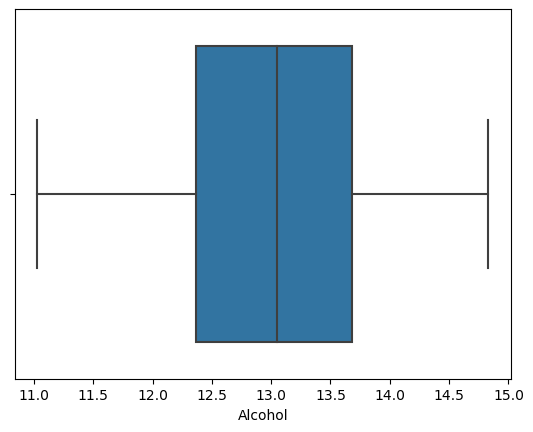

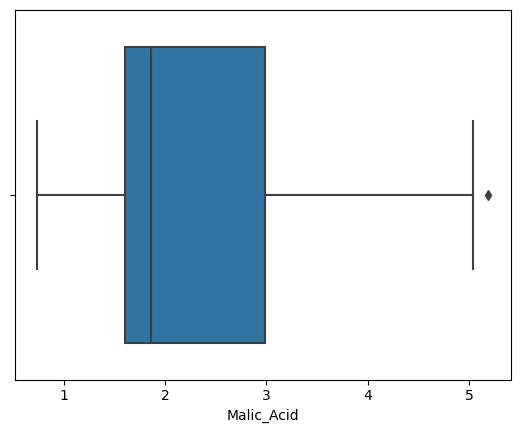

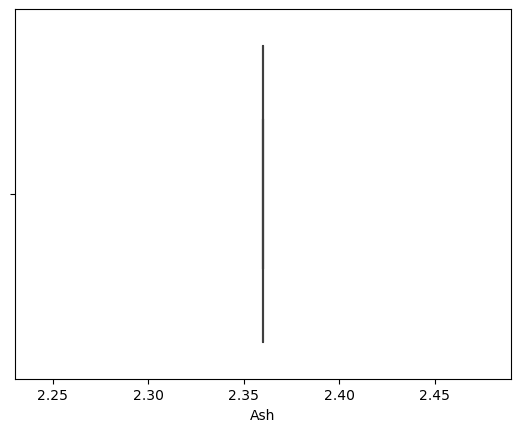

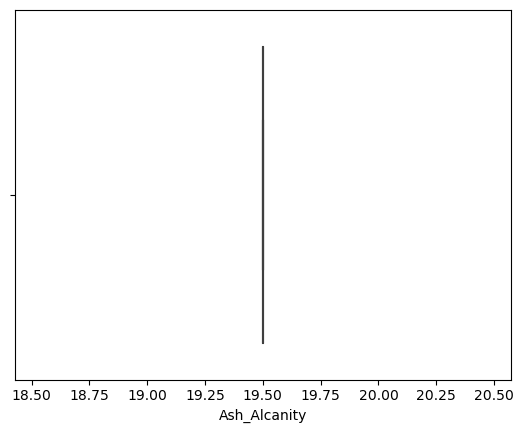

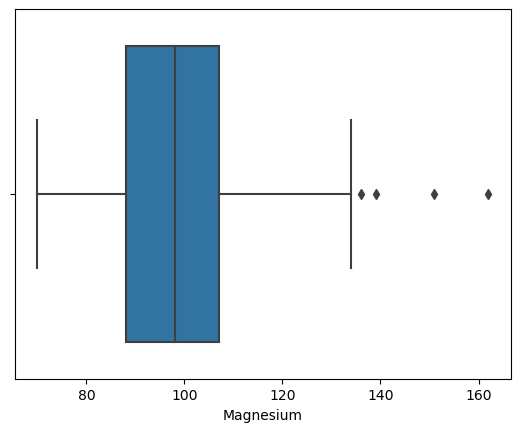

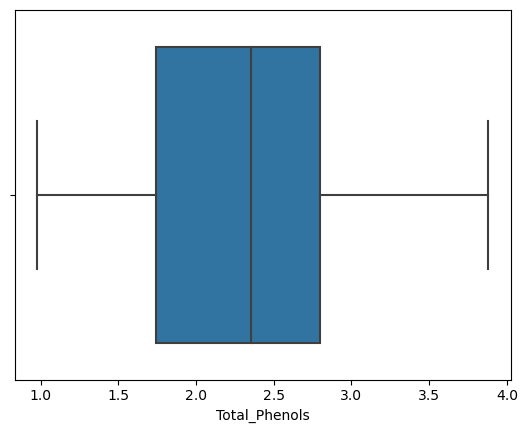

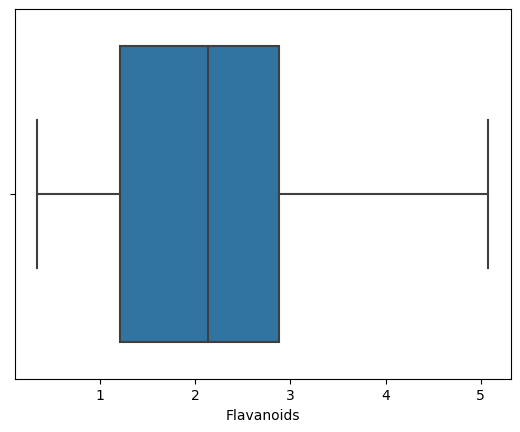

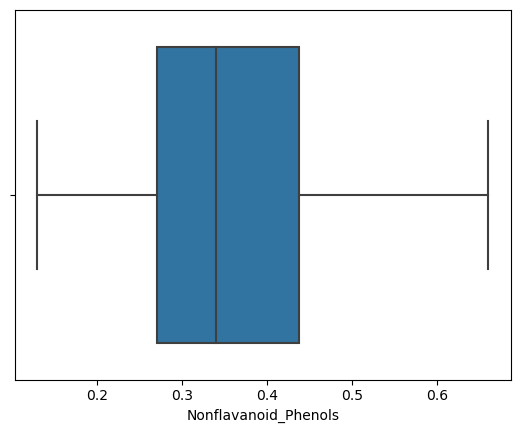

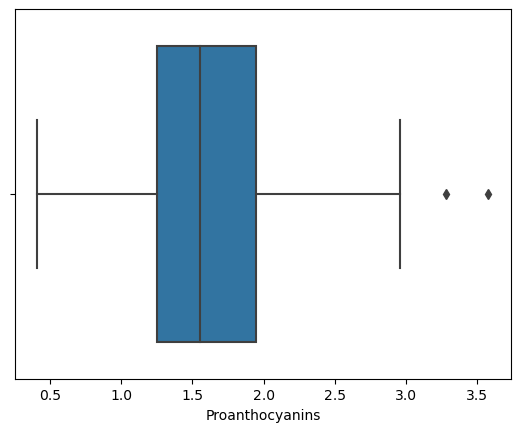

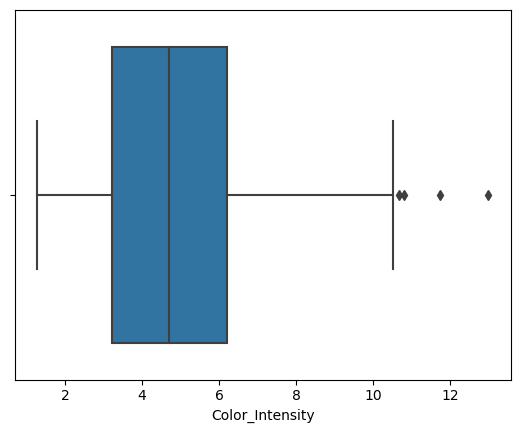

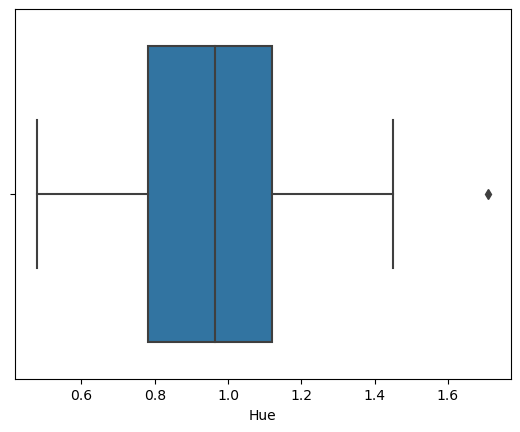

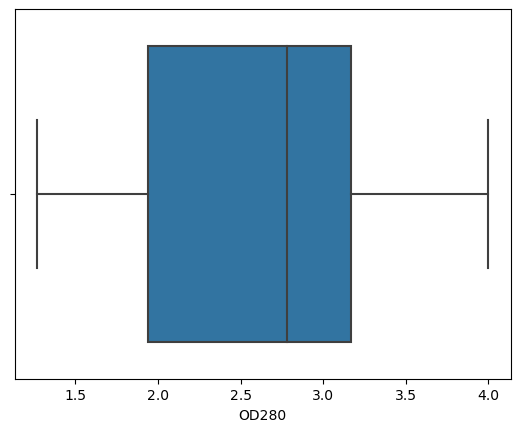

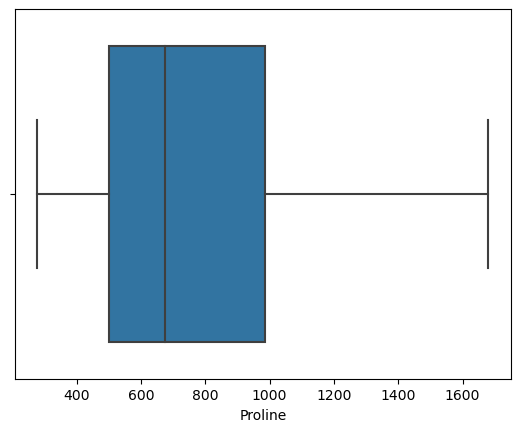

In [38]:
for i in wine:
    sns.boxplot(x=wine[i])
    plt.show()

# Modeling
# 1.K-Means Clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(wine1)
    wcss.append(kmeans.inertia_)

C:\Users\Chippy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
wcss

[38080.13780898876,
 15481.412287933093,
 9047.549896539735,
 5956.8148745015405,
 4767.219739463602,
 3944.450773557808,
 3375.9864465915584,
 2833.60211671037,
 2483.5445398603006,
 2271.5598296083763,
 2063.012005286318,
 1871.7293987432515]

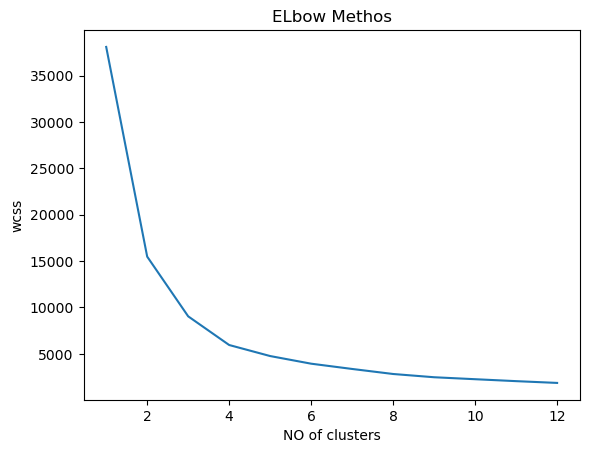

In [42]:
plt.plot(range(1,13),wcss)
plt.title('ELbow Methos')
plt.xlabel('NO of clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
kmeans = KMeans(n_clusters =3, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(wine)

In [44]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [45]:
print(y_kmeans)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [49]:
#silhouette Score
from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(wine,y_kmeans)
print(silhouette_sc)

0.5716743649958108


# AGGLOMERATIVE HIERARCHIAL CLUSTERING

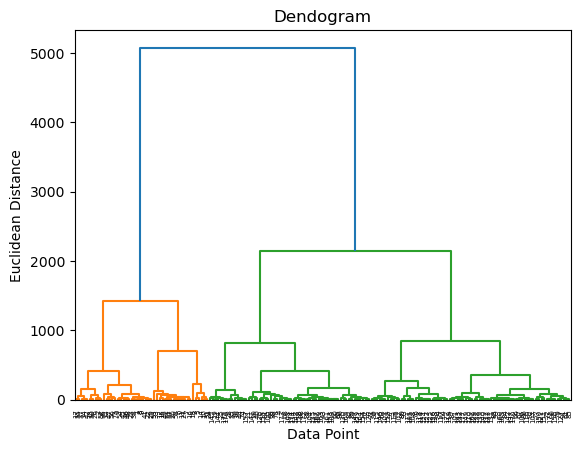

<Figure size 1000x700 with 0 Axes>

In [50]:
#Plotting dendogram for finding optimum number of clusters

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(wine,method='ward'))
plt.title('Dendogram')
plt.xlabel('Data Point')
plt.ylabel('Euclidean Distance')
plt.figure (figsize = (10,7))
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,affinity ='euclidean',linkage='ward')

In [53]:
y_hc = hc.fit_predict(wine)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [54]:
#silhoutte score
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(wine,y_hc)
print(silhoutte_avg)

0.6588997549637604


In [55]:
#using the inbuilt dataset from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(wine)
scaled_data = pd.DataFrame(scaled_data,columns=wine.columns)
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components = 10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [57]:
x_pca.shape

(178, 10)

In [58]:
pca.explained_variance_ratio_

array([0.4062259 , 0.21291582, 0.08093052, 0.07739411, 0.06036559,
       0.05491871, 0.03269852, 0.02498184, 0.02357782, 0.01604559])

In [59]:
np.sum(pca.explained_variance_ratio_)

0.9900544121415086

In [60]:
#SPECIFIYING VARIANCE
pca1 = PCA(n_components = 0.97)
pca1.fit(scaled_data)
x_pca1 = pca1.transform(scaled_data)

In [61]:
x_pca1.shape

(178, 9)

In [62]:
pca1.explained_variance_ratio_

array([0.4062259 , 0.21291582, 0.08093052, 0.07739411, 0.06036559,
       0.05491871, 0.03269852, 0.02498184, 0.02357782])

In [63]:
np.sum(pca1.explained_variance_ratio_)

0.9740088219207788

# DBSCAN

In [65]:
#import DBSCAN from sklearn.cluster
from sklearn.cluster import DBSCAN

In [66]:
#set and fit DBSCAN hyperparameters
eps=3
min_samples=20

dbscan=DBSCAN(eps=eps,min_samples=min_samples)
y_dbscan=dbscan.fit_predict(scaled_data)

In [70]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [71]:
wine["DBSCAN"]=y_dbscan
wine.tail(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster,DBSCAN
158,14.34,1.680,2.36,19.5,98,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660,-1,-1
159,13.48,1.670,2.36,19.5,89,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620,0,0
160,12.36,3.830,2.36,19.5,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520,0,0
161,13.69,3.260,2.36,19.5,107,1.83,0.56,0.50,0.80,5.880000,0.96,1.82,680,0,0
162,12.85,3.270,2.36,19.5,106,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570,0,0
163,12.96,3.450,2.36,19.5,106,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675,0,0
164,13.78,2.760,2.36,19.5,90,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615,0,0
165,13.73,4.360,2.36,19.5,88,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520,0,0
166,13.45,3.700,2.36,19.5,111,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695,0,0
167,12.82,3.370,2.36,19.5,88,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685,0,0


In [76]:
#find mean silhouette coefficient

silhouette_avg = silhouette_score(scaled_data,y_dbscan)
silhouette_avg

0.21746138836731777